 <h2 style='color:blue'>Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 251s 1us/step


##### Our dataset contains 60000 small training images that belongs to one of the below 10 classes
["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [14]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

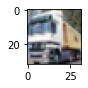

In [19]:
plot_sample(1)

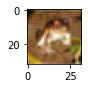

In [22]:
plot_sample(0)

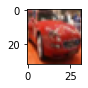

In [23]:
plot_sample(5)

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

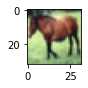

In [26]:
plot_sample(7)

In [27]:
classes[y_train[7][0]]

'horse'

In [28]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [29]:
y_test.shape

(10000, 1)

In [30]:
X_train.shape


(50000, 32, 32, 3)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [32]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [36]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
#using one hot encoding

In [37]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

 <h4 style="color:purple">Model building and training</h4>

In [42]:

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(2700, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.8129 - accuracy: 0.3568
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6245 - accuracy: 0.4281
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5412 - accuracy: 0.4557
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4839 - accuracy: 0.4766
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4338 - accuracy: 0.4934
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3913 - accuracy: 0.5098
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3545 - accuracy: 0.5215
Epoch 8/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.3155 - accuracy: 0.5379
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2862 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 63s 41m

 <h4 style="color:purple">Let's make some predictions</h4>

In [43]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 4s 14ms/step


3

In [44]:
y_test[0]

array([3], dtype=uint8)

In [45]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [46]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 71s 45ms/step - loss: 1.8138 - accuracy: 0.3516
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
